In [1]:
!pip install -q pytorch-tabnet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.6 MB/s eta 0:00:00


In [2]:
import torch
# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [3]:
import pandas as pd
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


# Load your data (replace 'your_data.csv' with your actual filename)
df = pd.read_csv('creditcard.csv')

# Define feature columns (exclude 'Class', which is your label)
feature_cols = [col for col in df.columns if col not in ['Time','Class']]

# Define X and y
X = df[feature_cols].values   # Features: all columns except 'Class'
y = df['Class'].values        # Target: 'Class' column

# Stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


clf = TabNetClassifier(
    device_name="cuda"  # 'cuda' for GPU, 'cpu' for CPU
)



Train shape: (227845, 29) (227845,)
Test shape: (56962, 29) (56962,)


In [4]:
# Fit TabNet (will use GPU if available) this parameter is speciality of
#pytorch_tabnet that you do not need to move model and data to GPU manually,
#just set the below parameter
clf = TabNetClassifier(
    device_name="cuda"  # 'cuda' for GPU, 'cpu' for CPU
)

# Fit TabNet (will use GPU if available) this parameter is speciality of
#pytorch_tabnet that you do not need to move model and data to GPU manually,
#just set the below parameter

# Fit TabNet
clf = TabNetClassifier()
clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['auc'],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Predict and evaluate
y_pred = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"Test ROC-AUC: {auc:.4f}")


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.01982 | val_0_auc: 0.88783 |  0:00:12s
epoch 1  | loss: 0.0059  | val_0_auc: 0.94015 |  0:00:23s
epoch 2  | loss: 0.00452 | val_0_auc: 0.95934 |  0:00:34s
epoch 3  | loss: 0.0041  | val_0_auc: 0.95602 |  0:00:44s
epoch 4  | loss: 0.00417 | val_0_auc: 0.96874 |  0:00:56s
epoch 5  | loss: 0.00406 | val_0_auc: 0.96563 |  0:01:07s
epoch 6  | loss: 0.00384 | val_0_auc: 0.96936 |  0:01:17s
epoch 7  | loss: 0.00364 | val_0_auc: 0.96621 |  0:01:28s
epoch 8  | loss: 0.00366 | val_0_auc: 0.97046 |  0:01:38s
epoch 9  | loss: 0.00354 | val_0_auc: 0.96652 |  0:01:49s
epoch 10 | loss: 0.00357 | val_0_auc: 0.96917 |  0:01:59s
epoch 11 | loss: 0.00343 | val_0_auc: 0.97074 |  0:02:10s
epoch 12 | loss: 0.00329 | val_0_auc: 0.96677 |  0:02:21s
epoch 13 | loss: 0.00368 | val_0_auc: 0.96258 |  0:02:31s
epoch 14 | loss: 0.00383 | val_0_auc: 0.95895 |  0:02:42s
epoch 15 | loss: 0.00369 | val_0_auc: 0.97056 |  0:02:53s
epoch 16 | loss: 0.00355 | val_0_auc: 0.97006 |  0:03:03s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Test ROC-AUC: 0.9707


In [7]:
# Predict and evaluate
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"Test ROC-AUC: {auc:.4f}")


Test ROC-AUC: 0.9707


Threshold: 0.5
Precision: 0.8085
Recall: 0.7755
F1-score: 0.7917
Precision-Recall AUC: 0.7462
Confusion Matrix:
[[56846    18]
 [   22    76]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9996     56864
           1     0.8085    0.7755    0.7917        98

    accuracy                         0.9993     56962
   macro avg     0.9041    0.8876    0.8957     56962
weighted avg     0.9993    0.9993    0.9993     56962



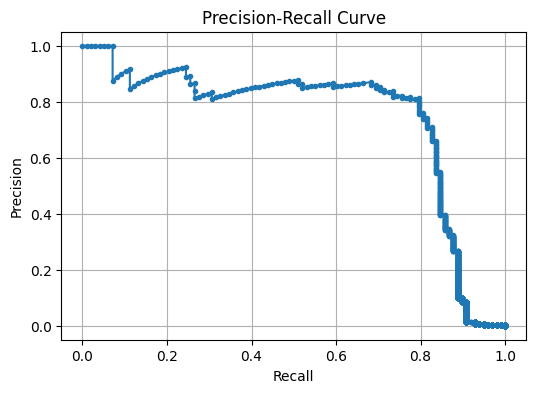


Threshold: 0.1
[[56802    62]
 [   16    82]]
Precision: 0.5694
Recall: 0.8367
F1-score: 0.6777

Threshold: 0.2
[[56830    34]
 [   17    81]]
Precision: 0.7043
Recall: 0.8265
F1-score: 0.7606

Threshold: 0.3
[[56840    24]
 [   20    78]]
Precision: 0.7647
Recall: 0.7959
F1-score: 0.7800

Threshold: 0.5
[[56846    18]
 [   22    76]]
Precision: 0.8085
Recall: 0.7755
F1-score: 0.7917

Threshold: 0.7
[[56854    10]
 [   39    59]]
Precision: 0.8551
Recall: 0.6020
F1-score: 0.7066


In [8]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    confusion_matrix, precision_recall_curve,
    average_precision_score, classification_report
)
import matplotlib.pyplot as plt
import numpy as np

# --- Assuming you already have these from earlier ---
# y_test: true labels for your test set
# y_pred_proba: predicted probabilities for class 1 (fraud) from TabNet

# Choose a threshold for classification
threshold = 0.5
y_pred = (y_pred_proba >= threshold).astype(int)

# Compute metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred_proba)
conf_mat = confusion_matrix(y_test, y_pred)

print(f"Threshold: {threshold}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision-Recall AUC: {pr_auc:.4f}")
print("Confusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Plot Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6,4))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# (Optional) See how metrics change with different thresholds
for thresh in [0.1, 0.2, 0.3, 0.5, 0.7]:
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    print(f"\nThreshold: {thresh}")
    print(confusion_matrix(y_test, y_pred_thresh))
    print(f"Precision: {precision_score(y_test, y_pred_thresh):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_thresh):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred_thresh):.4f}")
